# Time-Token Matrices

DS 5001 Text as Data

**Purpose**: We demonstrate a non-BOW vector space, the TOKEN-TIME matrix.

## Set Up

### Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

### Config

In [3]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home'] 
output_dir = config['DEFAULT']['output_dir']
data_prefix = 'austen-melville'

In [9]:
OHCO = "book_id chap_id para_num sent_num token_num".split()
book_str = 'Persuasion'
data_prefix = 'austen-melville'

## Prepare the Data

### Import tables

In [10]:
TOKEN = pd.read_csv('{}/{}-CORPUS.csv'.format(output_dir, data_prefix)).set_index(OHCO)
LIB = pd.read_csv('{}/{}-LIB.csv'.format(output_dir, data_prefix)).set_index('book_id')

In [11]:
TOKEN.head()

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                             
105     1       1        0        0               ('Sir', 'NNP')  NNP   
                                  1            ('Walter', 'NNP')  NNP   
                                  2           ('Elliot,', 'NNP')  NNP   
                                  3                 ('of', 'IN')   IN   
                                  4          ('Kellynch', 'NNP')  NNP   

                                            token_str  term_str pos_group  
book_id chap_id para_num sent_num token_num                                
105     1       1        0        0               Sir       sir        NN  
                                  1            Walter    walter        NN  
                                  2           Elliot,    elliot        NN  
                                  3                of        of        IN  
                                  4          Kellynch  kellynch        NN

### Select a book

In [12]:
my_book_id = LIB[LIB.title.str.match(book_str.upper())].index[0]

In [13]:
my_book_id

105

In [14]:
BOOK = TOKEN.loc[my_book_id].copy()

In [15]:
BOOK.head()

pos_tuple  pos token_str  \
chap_id para_num sent_num token_num                                       
1       1        0        0               ('Sir', 'NNP')  NNP       Sir   
                          1            ('Walter', 'NNP')  NNP    Walter   
                          2           ('Elliot,', 'NNP')  NNP   Elliot,   
                          3                 ('of', 'IN')   IN        of   
                          4          ('Kellynch', 'NNP')  NNP  Kellynch   

                                     term_str pos_group  
chap_id para_num sent_num token_num                      
1       1        0        0               sir        NN  
                          1            walter        NN  
                          2            elliot        NN  
                          3                of        IN  
                          4          kellynch        NN

## Create Token-Time Matrix

We use `df.get_dummies()` to create the space.

In [19]:
TTM = pd.get_dummies(BOOK['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'

In [20]:
TTM = TTM.astype('int')

In [21]:
TTM

,16,1760,1784,1785,1787,1789,1791,1800,1803,1806,...,your,yours,yourself,yourselves,youth,youthful,z,zeal,zealous,zealously
time_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize Dispersion Plots of Words

In [23]:
cfg = {'figsize': (20,1)}

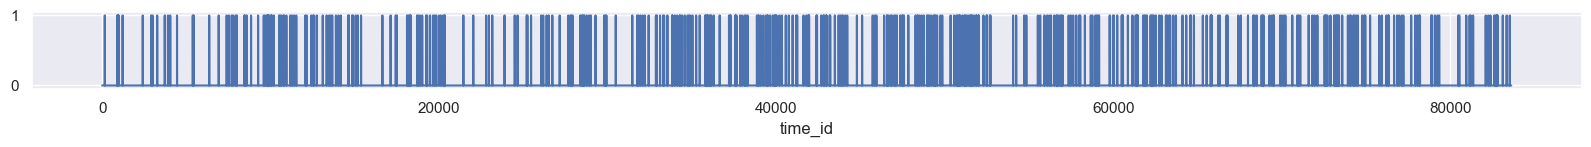

In [24]:
TTM['anne'].plot(**cfg);

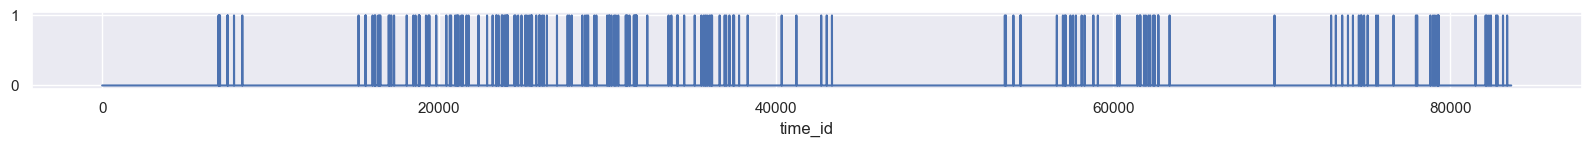

In [25]:
TTM['wentworth'].plot(**cfg);

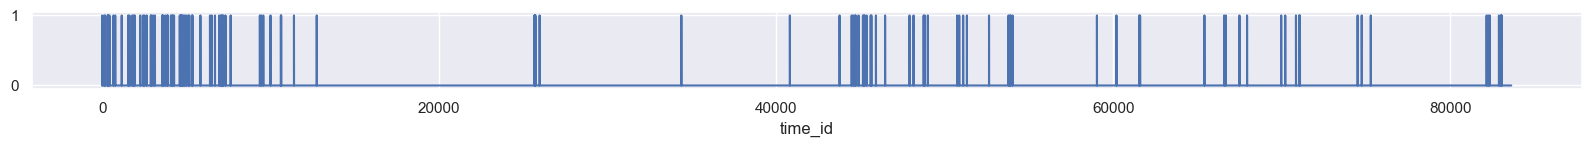

In [26]:
TTM['walter'].plot(**cfg);

## Do Better with Seaborn Strip Plots

In [27]:
B = BOOK['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})

In [28]:
B.head()

,offset,term_str
0,0,sir
1,1,walter
2,2,elliot
3,3,of
4,4,kellynch


In [29]:
def plot_words(words, book):    
    
    X = book[book.term_str.isin(words)]
    
    plt.figure(figsize=(22, len(words)))
    
    ax = sns.stripplot(y='term_str', x='offset', data=X, orient='h', marker=".", color='navy', size=15, jitter=0)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Term', size=20)
    
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

In [30]:
names = 'walter elizabeth russell anne wentworth mary lyme bath'.split()

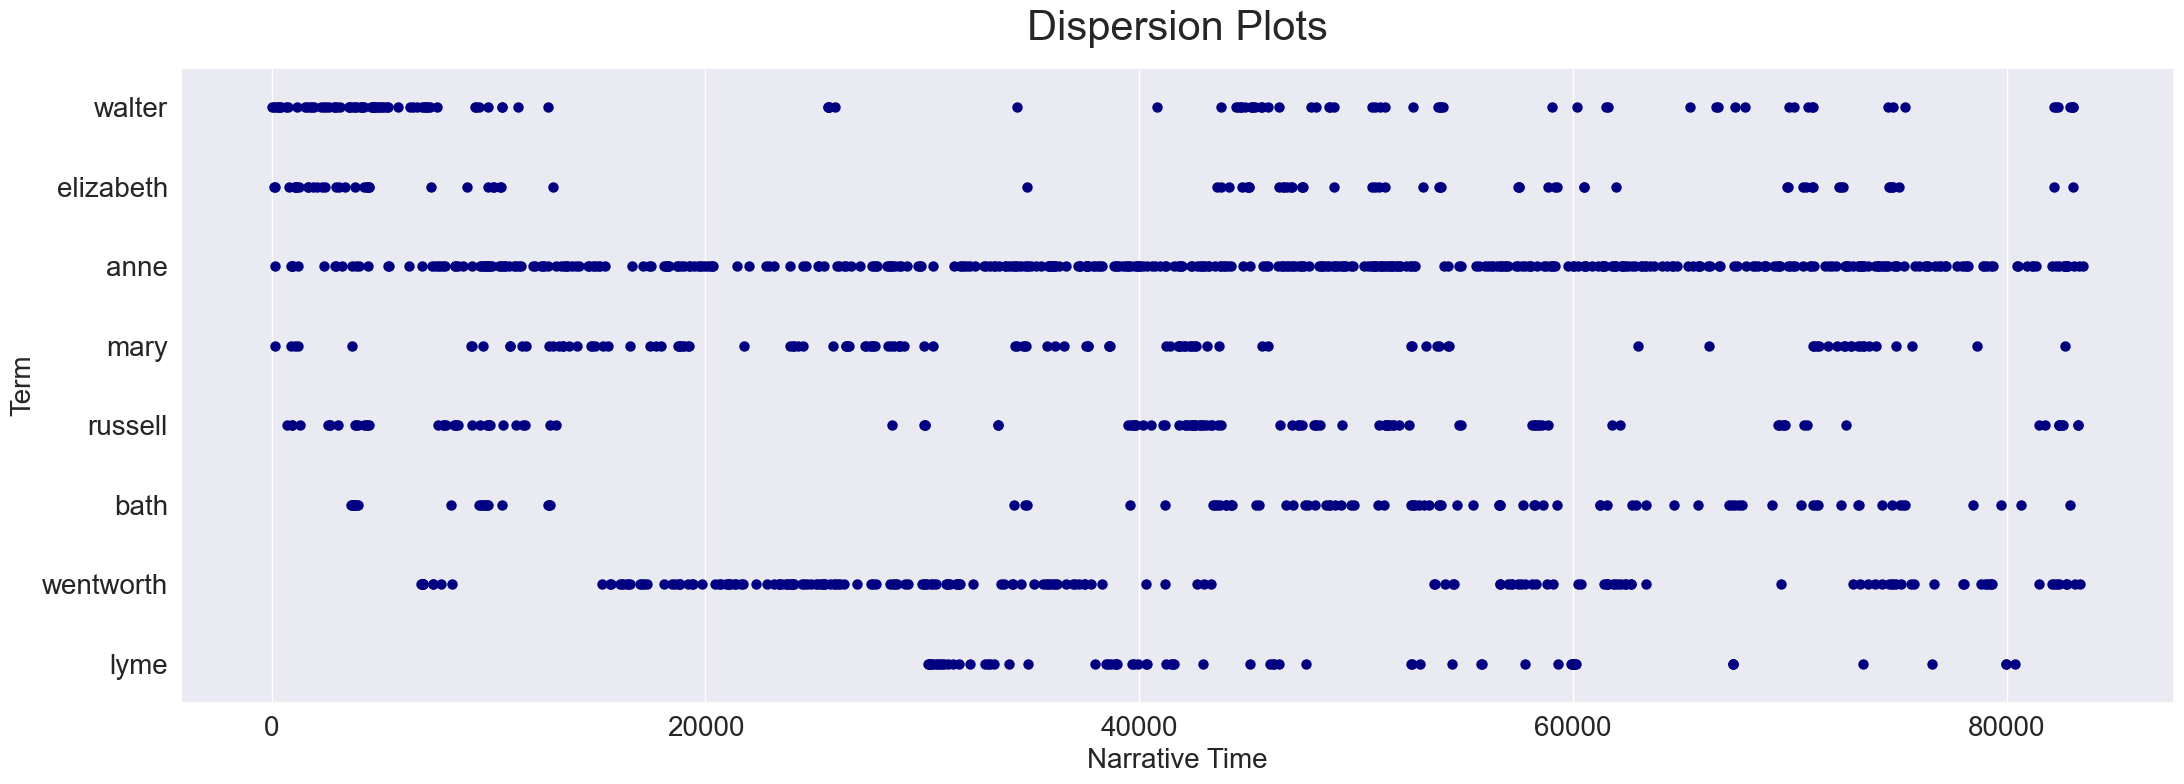

In [31]:
plot_words(names, B)

## Use KDE

KDE works by positing that each instance of a token represents a small gaussian distribution before and after the word. When words appear in bunches, their curves add up, producing an aggregate curve over narrative time.

In [32]:
kde_kernel = 'gaussian'
kde_bandwidth = 2000
kde_samples = 1000

In [33]:
import numpy as np
import scipy as sp
from sklearn.neighbors import KernelDensity as KDE
from nltk.corpus import stopwords

### Create arrays of offsets for each term

In [34]:
X = B.reset_index().groupby(['term_str']).offset.apply(lambda x: x.tolist()).to_frame()

In [35]:
X['x'] = X.apply(lambda x: np.array(x.offset)[:, np.newaxis], 1)

In [36]:
X.head()

,offset,x
term_str,,
1,"[121, 153]","[[121], [153]]"
15,[125],[[125]]
16,[209],[[209]]
1760,[122],[[122]]
1784,[126],[[126]]


### Get KDE for each term

In [37]:
scale_max = B.offset.max() # THIS IS CRUCIAL
x_axis = np.linspace(0, scale_max, kde_samples)[:, np.newaxis]
X['kde'] = X.apply(lambda row: KDE(kernel=kde_kernel, bandwidth=kde_bandwidth).fit(row.x), 1)
X['scores'] = X.apply(lambda row: row.kde.score_samples(x_axis), axis=1)
# B['scaled'] = B.apply(lambda row: np.exp(row.scores) * (scale_max / kde_samples), axis=1)

### Visualize KDE plots

In [38]:
PLOTS = X.apply(lambda row: pd.Series(np.exp(row.scores) * (scale_max / kde_samples)), axis=1)

In [39]:
FIG = dict(figsize=(15, 5))

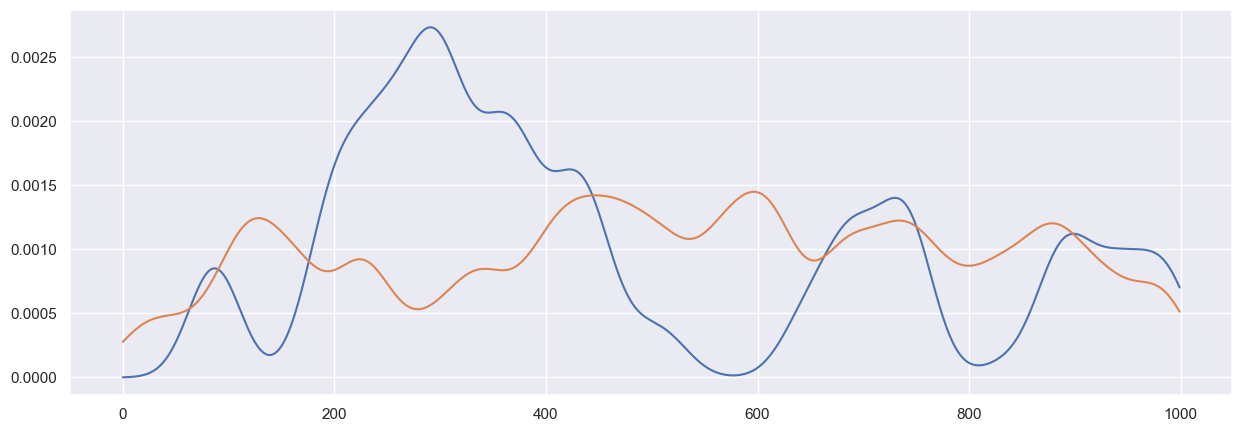

In [40]:
PLOTS.loc['wentworth'].plot(**FIG);
PLOTS.loc['anne'].plot(**FIG);

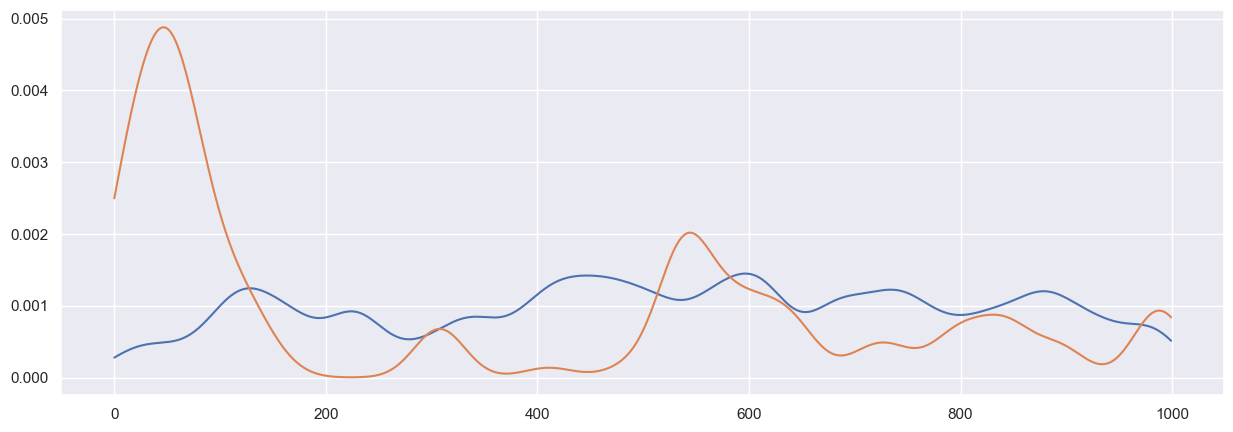

In [41]:
PLOTS.loc['anne'].plot(**FIG);
PLOTS.loc['walter'].plot(**FIG);

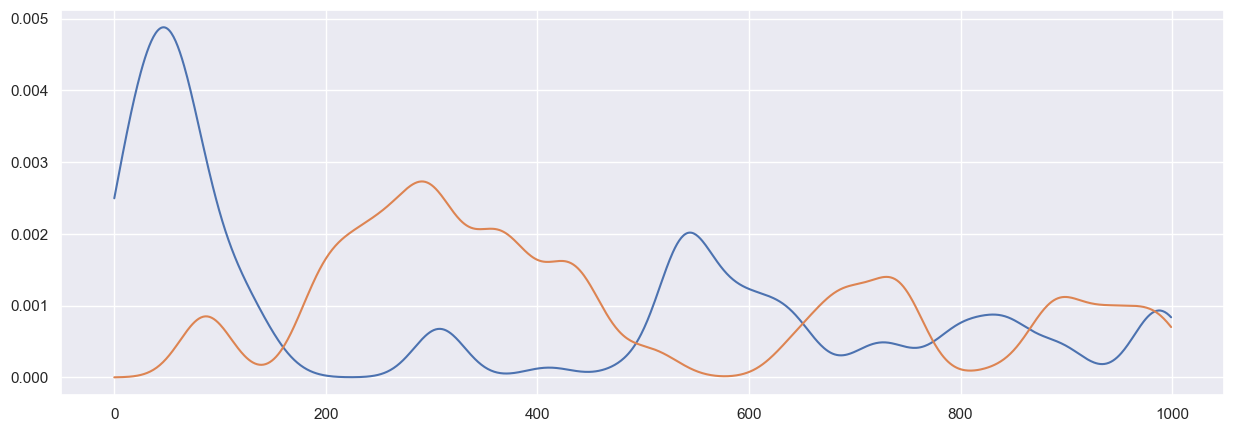

In [42]:
PLOTS.loc['walter'].plot(**FIG);
PLOTS.loc['wentworth'].plot(**FIG);

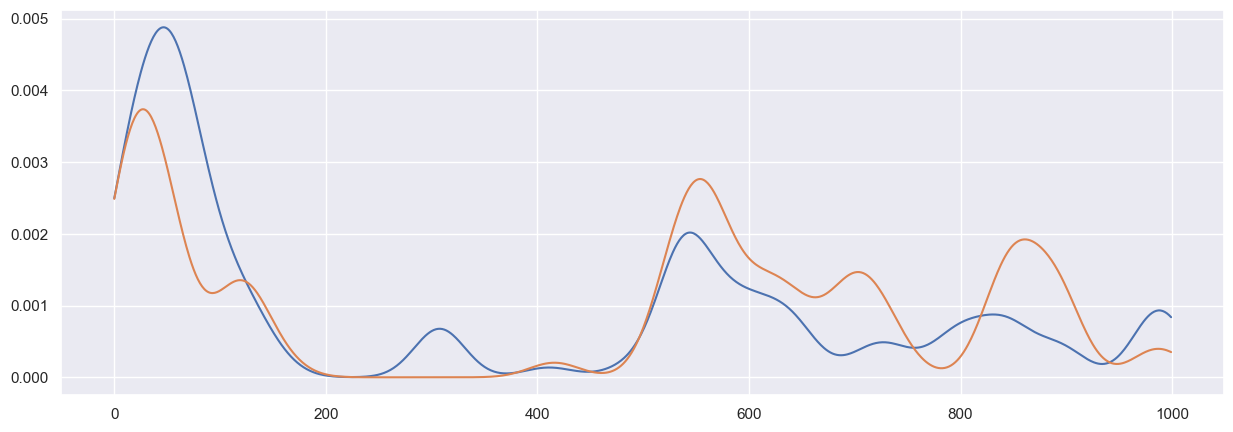

In [43]:
PLOTS.loc['walter'].plot(**FIG);
PLOTS.loc['elizabeth'].plot(**FIG);

## Question

We can treat each word as a vector of narrative time. What can we learn by correlated words in this space?

For a clue, see [this essay](https://github.com/davidmcclure/textplot) by David McClure.

<!-- Original:
https://web.archive.org/web/20190305090133/http://dclure.org/essays/mental-maps-of-texts/
-->